In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%run main.py

In [14]:
# read geodata of hk
dcca = gpd.read_file("../data/DCCA_21C.geojson").to_crs(epsg=4326)
# read geodata of public market
market = gpd.read_file("../data/PMRK.geojson").to_crs(epsg=4326)
# read geodata of yoshinoya
yoshi = read_json_data("../data/yoshinoya.json",drop_duplicates=True)

In [3]:
def plot_loc(df,ax=None,color='red',name=None,markersize=15):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,10))
    dcca.plot(ax=ax,color="grey")
    market.plot(ax=ax,markersize=markersize,color="green",alpha=0.3,label="Public Market")
    df.plot(ax=ax,markersize=markersize,color=color,label=name)
    ax.set_title(f"Location of {name}(Count: {len(df)})")
    ax.legend()
    return ax

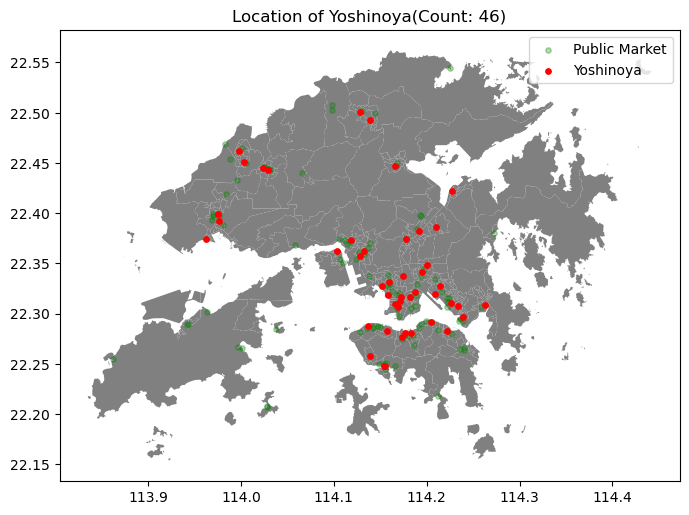

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
plot_loc(yoshi,ax=ax, color='red',name="Yoshinoya")
plt.show()

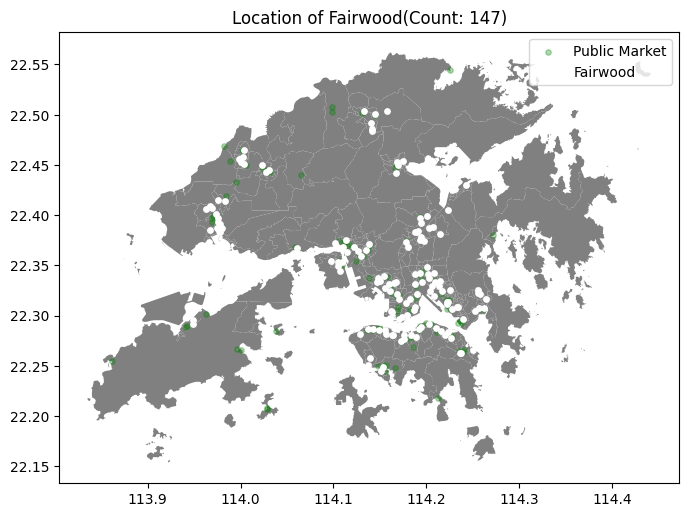

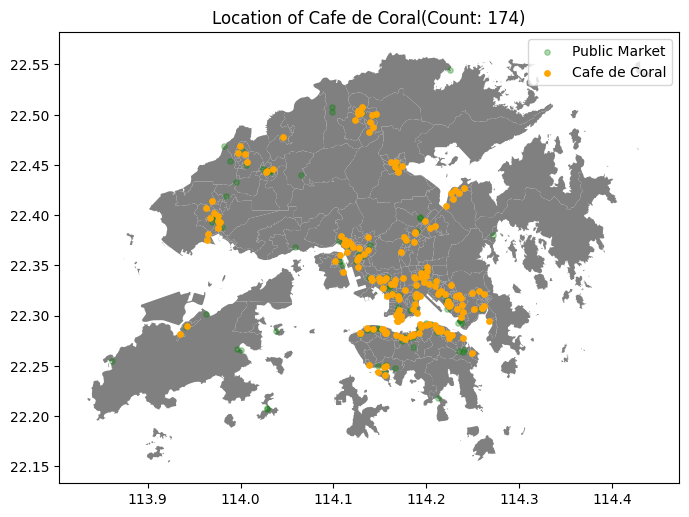

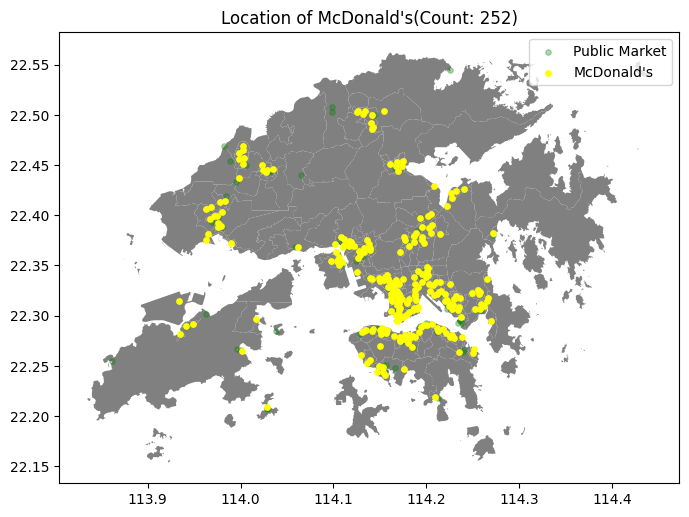

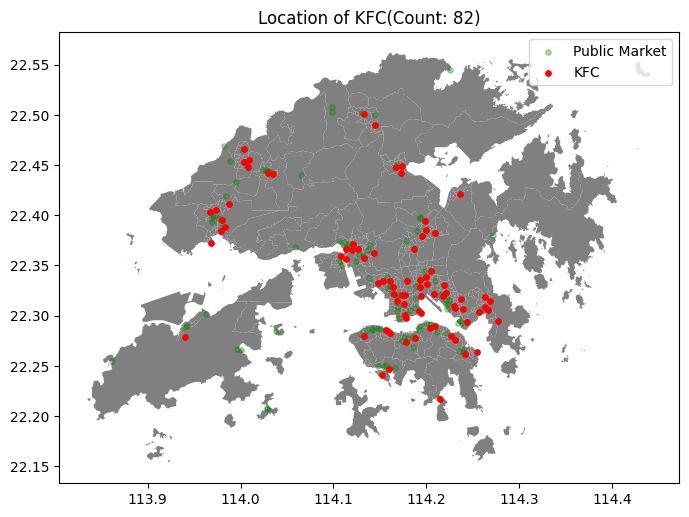

In [5]:
competitor_path = {
    "Fairwood":"../data/fairwood.json",
    "Cafe de Coral":"../data/cdc.json",
    "McDonald's":"../data/mcdonalds.json",
    "KFC":"../data/kfc.json",
}

competitor_color = {
    "Fairwood":"white",
    "Cafe de Coral":"orange",
    "McDonald's":"yellow",
    "KFC":"red",
}

for (name, path),color in zip(competitor_path.items(),competitor_color.values()):
    df = read_json_data(path)
    fig, ax = plt.subplots(figsize=(8,8))
    plot_loc(df,ax=ax, color=color,name=name)
    plt.show()

In [68]:
def plot_feature_and_store(df,ax=None,feature='t_pop',feature_name='Total Population'):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,8))
    dcca.plot(feature,cmap="rainbow",ax=ax,legend=True)
    ax.scatter(df.geometry.x,df.geometry.y,edgecolors='k',s=20,facecolors='none')
    ax.set_title(f"{feature_name}")
    return ax

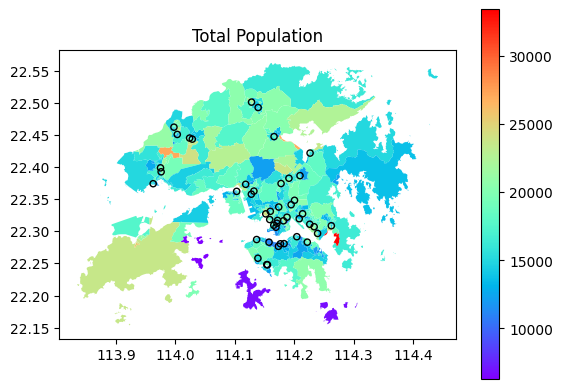

In [7]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='t_pop',feature_name='Total Population')
plt.show()

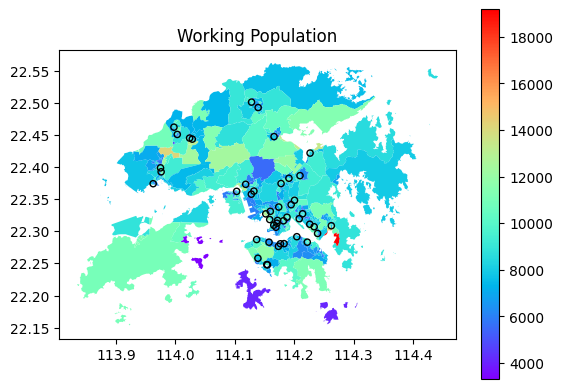

In [8]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='t_wp',feature_name='Working Population')
plt.show()

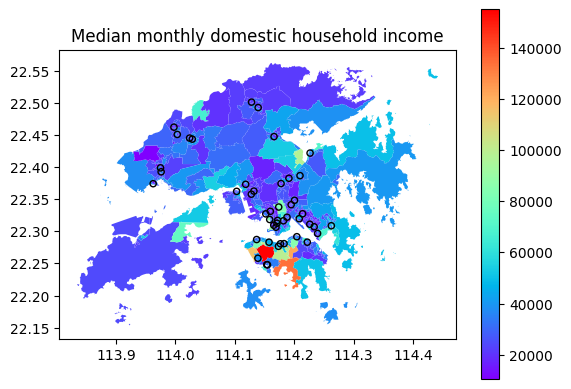

In [9]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='ma_hh',feature_name='Median monthly domestic household income')
plt.show()

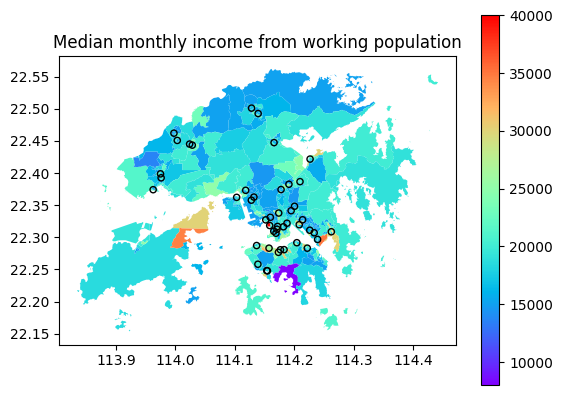

In [10]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='t_mmearn',feature_name='Median monthly income from working population')
plt.show()

In [11]:
dcca['t_tmmearn'] = dcca.t_mmearn*dcca.t_wp

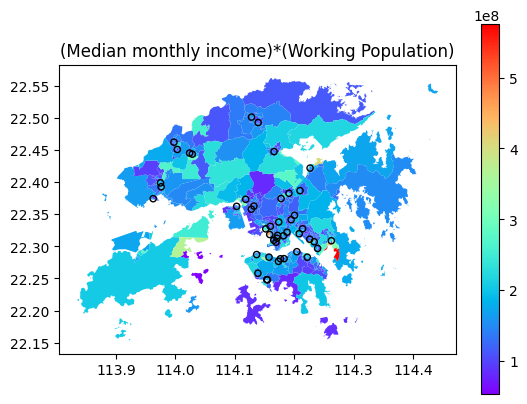

In [12]:
fig, ax = plt.subplots()
plot_feature_and_store(yoshi,ax=ax,feature='t_tmmearn',feature_name='(Median monthly income)*(Working Population)')
plt.show()

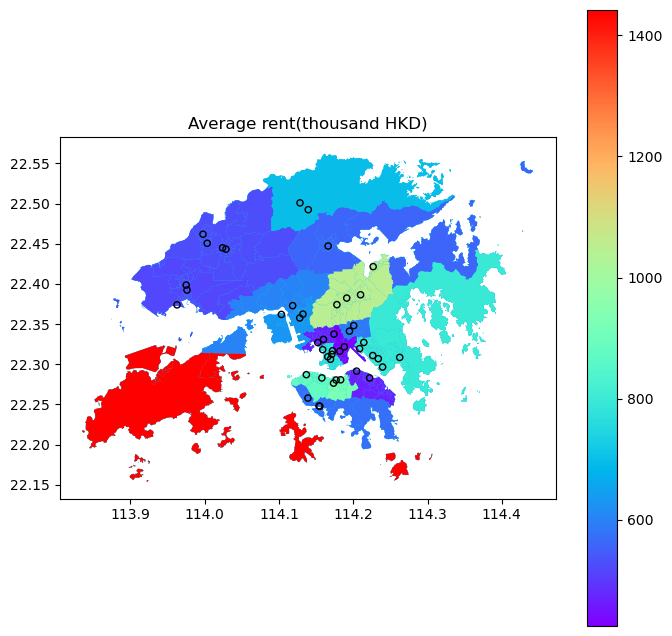

In [71]:
rent = gpd.read_file("../data/Shop_and_Other_Commercial_Assessments.geojson").to_crs(epsg=4326)
rent = gpd.overlay(dcca, rent, how='intersection')
rent['Shop_RV_HKD_In_Thousand'] = rent['Shop_RV_HKD_In_Thousand'].astype(float)
rent['Shop_Number'] = rent['Shop_Number'].astype(float)
rent['avg_rent'] = rent['Shop_RV_HKD_In_Thousand']/rent['Shop_Number']
fig, ax = plt.subplots(figsize=(8,8))
rent.plot('avg_rent',cmap="rainbow",ax=ax,legend=True)
ax.scatter(yoshi.geometry.x,yoshi.geometry.y,edgecolors='k',s=20,facecolors='none')
ax.set_title('Average rent(thousand HKD)')
plt.show()